In [22]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

## 1. Pivot table

In [23]:
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
                         "bar", "bar", "bar", "bar"],
                   "B": ["one", "one", "one", "two", "two",
                         "one", "one", "two", "two"],
                   "C": ["small", "large", "large", "small",
                         "small", "large", "small", "small",
                         "large"],
                   "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
                   "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})
df

,A,B,C,D,E
0,foo,one,small,1,2
1,foo,one,large,2,4
2,foo,one,large,2,5
3,foo,two,small,3,5
4,foo,two,small,3,6
5,bar,one,large,4,6
6,bar,one,small,5,8
7,bar,two,small,6,9
8,bar,two,large,7,9


In [24]:
table = pd.pivot_table(df, values='D', index=['A', 'B'],
                    columns=['C'], aggfunc=np.sum)
table


C        large  small
A   B                
bar one    4.0    5.0
    two    7.0    6.0
foo one    4.0    1.0
    two    NaN    6.0

In [25]:
table = pd.pivot_table(df, values='D', index=['A', 'B'],
                    columns=['C'], aggfunc=np.sum, fill_value=0)
table

C        large  small
A   B                
bar one      4      5
    two      7      6
foo one      4      1
    two      0      6

In [26]:
table = pd.pivot_table(df, values=['D', 'E'], index=['A', 'C'],
                    aggfunc={'D': np.mean,
                             'E': [min, max, np.mean]})
table

D    E               
               mean  max      mean  min
A   C                                  
bar large  5.500000  9.0  7.500000  6.0
    small  5.500000  9.0  8.500000  8.0
foo large  2.000000  5.0  4.500000  4.0
    small  2.333333  6.0  4.333333  2.0

## 2. Sorting DataFrames

In [27]:
df = pd.DataFrame({
    'col1': ['A', 'A', 'B', np.nan, 'D', 'C'],
    'col2': [2, 1, 9, 8, 7, 4],
    'col3': [0, 1, 9, 4, 2, 3],
    'col4': ['a', 'B', 'c', 'D', 'e', 'F']
})

In [28]:
df.sort_values(by=['col1'])

,col1,col2,col3,col4
0,A,2,0,a
1,A,1,1,B
2,B,9,9,c
5,C,4,3,F
4,D,7,2,e
3,NaN,8,4,D


In [29]:
df.sort_values(by=['col1', 'col2'])

,col1,col2,col3,col4
1,A,1,1,B
0,A,2,0,a
2,B,9,9,c
5,C,4,3,F
4,D,7,2,e
3,NaN,8,4,D


In [30]:
df.sort_values(by='col1', ascending=False)

,col1,col2,col3,col4
4,D,7,2,e
5,C,4,3,F
2,B,9,9,c
0,A,2,0,a
1,A,1,1,B
3,NaN,8,4,D


## 3. Indexing and Selecting Data

In [31]:
dates = pd.date_range('1/1/2000', periods=8)
df = pd.DataFrame(np.random.randn(8, 4),
                  index=dates, columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
2000-01-01,0.650364,-0.680127,1.207883,1.972823
2000-01-02,0.434284,1.553145,0.940523,-0.286545
2000-01-03,1.614083,0.790946,1.316631,-1.415154
2000-01-04,0.985116,-0.461935,-1.222688,-0.938509
2000-01-05,0.198531,1.431158,-0.077638,1.064912
2000-01-06,0.696599,-1.562367,0.903400,-0.042253
2000-01-07,-1.119575,0.677741,-1.725609,-1.244687
2000-01-08,0.231479,-0.241854,0.011249,-1.123597


In [32]:
s = df['A']
s[dates[5]]

0.6965991524847235

In [33]:
df[['B', 'A']] = df[['A', 'B']]
df

,A,B,C,D
2000-01-01,-0.680127,0.650364,1.207883,1.972823
2000-01-02,1.553145,0.434284,0.940523,-0.286545
2000-01-03,0.790946,1.614083,1.316631,-1.415154
2000-01-04,-0.461935,0.985116,-1.222688,-0.938509
2000-01-05,1.431158,0.198531,-0.077638,1.064912
2000-01-06,-1.562367,0.696599,0.903400,-0.042253
2000-01-07,0.677741,-1.119575,-1.725609,-1.244687
2000-01-08,-0.241854,0.231479,0.011249,-1.123597


## 4. Impute Missing Values

In [41]:
df = load_iris()
df = pd.DataFrame(df['data'])
df.fillna(1)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## 5. Plotting

<AxesSubplot:ylabel='Frequency'>

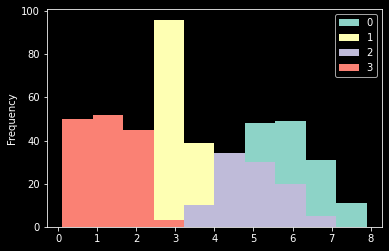

In [46]:
df.plot(kind='hist')
